In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd


In [3]:
teams=pd.read_csv("/content/drive/MyDrive/teams.csv")

In [4]:
teams

,team,country,year,events,athletes,age,height,weight,medals,prev_medals,prev_3_medals
0,AFG,Afghanistan,1964,8,8,22.0,161.0,64.2,0,0.0,0.0
1,AFG,Afghanistan,1968,5,5,23.2,170.2,70.0,0,0.0,0.0
2,AFG,Afghanistan,1972,8,8,29.0,168.3,63.8,0,0.0,0.0
3,AFG,Afghanistan,1980,11,11,23.6,168.4,63.2,0,0.0,0.0
4,AFG,Afghanistan,2004,5,5,18.6,170.8,64.8,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2139,ZIM,Zimbabwe,2000,19,26,25.0,179.0,71.1,0,0.0,0.0
2140,ZIM,Zimbabwe,2004,11,14,25.1,177.8,70.5,3,0.0,0.0
2141,ZIM,Zimbabwe,2008,15,16,26.1,171.9,63.7,4,3.0,1.0
2142,ZIM,Zimbabwe,2012,8,9,27.3,174.4,65.2,0,4.0,2.3


In [5]:

corr = teams.drop(["team", "country"], axis=1).corr()["medals"]
print(corr)

year            -0.021603
events           0.771330
athletes         0.840817
age              0.025096
height           0.141055
weight           0.090577
medals           1.000000
prev_medals      0.920048
prev_3_medals    0.918438
Name: medals, dtype: float64


In [6]:
import seaborn as sns

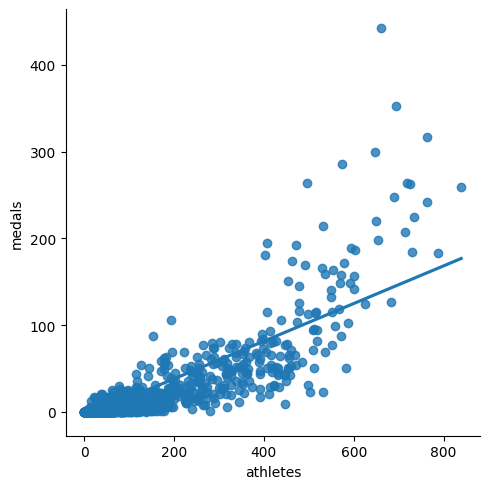

In [7]:
sns.lmplot(x="athletes",y='medals',data=teams,fit_reg=True,ci=None)

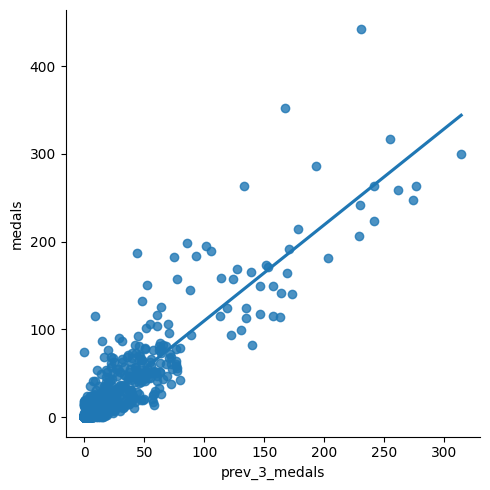

In [9]:
sns.lmplot(x="prev_3_medals",y='medals',data=teams,fit_reg=True,ci=None)

<Axes: ylabel='Frequency'>

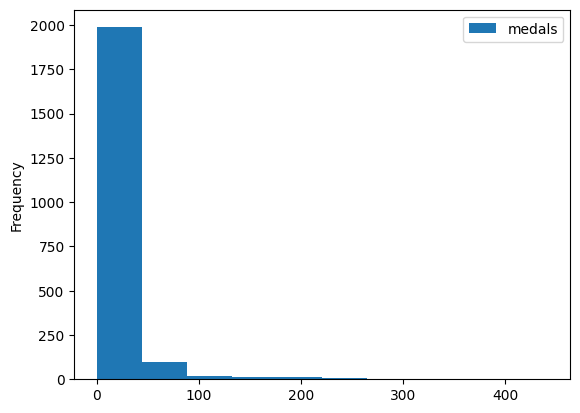

In [10]:
teams.plot.hist(y="medals")

In [11]:
teams[teams.isnull().any(axis=1)]

,team,country,year,events,athletes,age,height,weight,medals,prev_medals,prev_3_medals
19,ALB,Albania,1992,8,9,25.3,163.0,75.2,0,NaN,NaN
26,ALG,Algeria,1964,7,7,26.0,175.0,65.0,0,NaN,NaN
39,AND,Andorra,1976,2,3,28.3,174.7,78.0,0,NaN,NaN
50,ANG,Angola,1980,14,17,17.4,171.7,62.5,0,NaN,NaN
59,ANT,Antigua and Barbuda,1976,11,17,23.2,178.6,71.6,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2092,VIN,Saint Vincent and the Grenadines,1988,6,6,20.5,157.0,57.0,0,NaN,NaN
2103,YAR,North Yemen,1984,3,3,27.7,163.3,57.7,0,NaN,NaN
2105,YEM,Yemen,1992,8,8,19.6,169.0,60.0,0,NaN,NaN
2112,YMD,South Yemen,1988,5,5,23.6,175.0,63.3,0,NaN,NaN


In [113]:
teams=teams.dropna()

In [114]:
teams

,team,country,year,events,athletes,age,height,weight,medals,prev_medals,prev_3_medals
0,AFG,Afghanistan,1964,8,8,22.0,161.0,64.2,0,0.0,0.0
1,AFG,Afghanistan,1968,5,5,23.2,170.2,70.0,0,0.0,0.0
2,AFG,Afghanistan,1972,8,8,29.0,168.3,63.8,0,0.0,0.0
3,AFG,Afghanistan,1980,11,11,23.6,168.4,63.2,0,0.0,0.0
4,AFG,Afghanistan,2004,5,5,18.6,170.8,64.8,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2139,ZIM,Zimbabwe,2000,19,26,25.0,179.0,71.1,0,0.0,0.0
2140,ZIM,Zimbabwe,2004,11,14,25.1,177.8,70.5,3,0.0,0.0
2141,ZIM,Zimbabwe,2008,15,16,26.1,171.9,63.7,4,3.0,1.0
2142,ZIM,Zimbabwe,2012,8,9,27.3,174.4,65.2,0,4.0,2.3


In [115]:
train=teams[teams["year"]<2012].copy()
test=teams[teams["year"]>=2012].copy()

In [116]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()

In [117]:
predictors=["athletes","prev_3_medals",'prev_medals','events']
target="medals"

In [118]:
reg.fit(train[predictors],train['medals'])
LinearRegression()

LinearRegression()

In [119]:
predictions=reg.predict(test[predictors])

In [120]:
test['predictions']=predictions

In [121]:
test

,team,country,year,events,athletes,age,height,weight,medals,prev_medals,prev_3_medals,predictions
6,AFG,Afghanistan,2012,6,6,24.8,171.7,60.8,1,1.0,0.3,0.306768
7,AFG,Afghanistan,2016,3,3,24.7,173.7,74.0,0,1.0,0.7,0.978245
24,ALB,Albania,2012,9,10,25.7,176.8,80.2,0,0.0,0.0,-0.475150
25,ALB,Albania,2016,6,6,23.7,176.2,67.2,0,0.0,0.0,-0.188529
37,ALG,Algeria,2012,29,39,24.8,174.3,66.9,1,2.0,2.3,-0.173237
...,...,...,...,...,...,...,...,...,...,...,...,...
2111,YEM,Yemen,2016,3,3,19.3,169.7,65.7,0,0.0,0.0,0.313837
2131,ZAM,Zambia,2012,7,7,22.6,176.2,74.2,0,0.0,0.0,-0.355984
2132,ZAM,Zambia,2016,7,7,24.1,175.2,67.5,0,0.0,0.0,-0.355984
2142,ZIM,Zimbabwe,2012,8,9,27.3,174.4,65.2,0,4.0,2.3,2.138548


In [122]:
test.loc[test['predictions']<0,'predictions']=0

In [123]:
test['predictions']=test['predictions'].round()

In [124]:
test

,team,country,year,events,athletes,age,height,weight,medals,prev_medals,prev_3_medals,predictions
6,AFG,Afghanistan,2012,6,6,24.8,171.7,60.8,1,1.0,0.3,0.0
7,AFG,Afghanistan,2016,3,3,24.7,173.7,74.0,0,1.0,0.7,1.0
24,ALB,Albania,2012,9,10,25.7,176.8,80.2,0,0.0,0.0,0.0
25,ALB,Albania,2016,6,6,23.7,176.2,67.2,0,0.0,0.0,0.0
37,ALG,Algeria,2012,29,39,24.8,174.3,66.9,1,2.0,2.3,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2111,YEM,Yemen,2016,3,3,19.3,169.7,65.7,0,0.0,0.0,0.0
2131,ZAM,Zambia,2012,7,7,22.6,176.2,74.2,0,0.0,0.0,0.0
2132,ZAM,Zambia,2016,7,7,24.1,175.2,67.5,0,0.0,0.0,0.0
2142,ZIM,Zimbabwe,2012,8,9,27.3,174.4,65.2,0,4.0,2.3,2.0


In [125]:
from sklearn.metrics import mean_absolute_error
error=mean_absolute_error(test['medals'],test['predictions'])

In [126]:
error

3.4024691358024692

In [127]:
teams.describe()['medals']

count    2014.000000
mean       10.990070
std        33.627528
min         0.000000
25%         0.000000
50%         0.000000
75%         5.000000
max       442.000000
Name: medals, dtype: float64

In [130]:
teams.describe()['medals']

,team,country,year,events,athletes,age,height,weight,medals,prev_medals,prev_3_medals,predictions
907,IND,India,2012,55,95,26.0,174.2,72.7,6,3.0,1.7,2.0
908,IND,India,2016,67,130,26.1,170.0,66.3,2,6.0,3.3,7.0


In [135]:
test[test['team']=='FRA']

,team,country,year,events,athletes,age,height,weight,medals,prev_medals,prev_3_medals,predictions
679,FRA,France,2012,188,426,26.6,177.4,70.8,82,77.0,65.3,77.0
680,FRA,France,2016,202,512,27.1,177.9,72.4,96,82.0,70.7,94.0


In [143]:
errors=(test['medals']-test["predictions"]).abs()

In [144]:
errors

6       1.0
7       1.0
24      0.0
25      0.0
37      1.0
       ... 
2111    0.0
2131    0.0
2132    0.0
2142    2.0
2143    3.0
Length: 405, dtype: float64

In [145]:
error_by_team=errors.groupby(test['team']).mean()

In [146]:
error_by_team

team
AFG    1.0
ALB    0.0
ALG    1.5
AND    0.0
ANG    4.0
      ... 
VIE    1.0
VIN    0.0
YEM    0.0
ZAM    0.0
ZIM    2.5
Length: 204, dtype: float64

In [147]:
medal_by_team=test['medals'].groupby(test['team']).mean()

In [156]:
error_ratio=error_by_team/medal_by_team

team
AFG    2.000000
ALG    1.000000
ANG         inf
ANT         inf
ARG    1.121951
         ...   
USA    0.089844
UZB    1.000000
VEN    1.000000
VIE    1.000000
ZIM         inf
Length: 114, dtype: float64

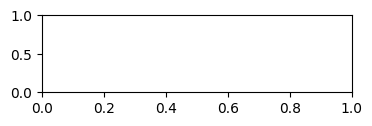

In [158]:
error_ratio[~pd.isnull(error_ratio)]

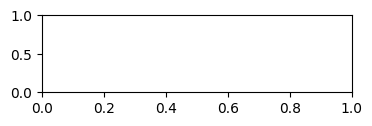

In [161]:
import numpy as np
error_ratio=error_ratio[np.isfinite(error_ratio)]

In [162]:
error_ratio

team
AFG    2.000000
ALG    1.000000
ARG    1.121951
ARM    1.000000
AUS    0.505102
         ...   
UKR    0.365854
USA    0.089844
UZB    1.000000
VEN    1.000000
VIE    1.000000
Length: 97, dtype: float64

<Axes: ylabel='Frequency'>

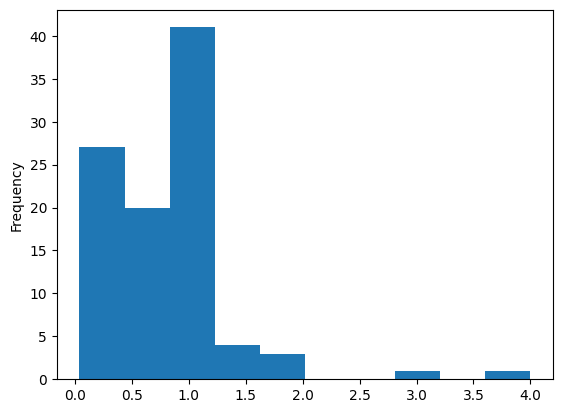

In [163]:
error_ratio.plot.hist()

In [165]:
error_ratio.sort_values()

team
FRA    0.039326
ITA    0.064286
ETH    0.066667
USA    0.089844
HUN    0.104167
         ...   
GAB    2.000000
UGA    2.000000
AFG    2.000000
BOT    3.000000
UAE    4.000000
Length: 97, dtype: float64

In [166]:
from sklearn.linear_model import Ridge

In [167]:
reg=Ridge(alpha=1.0)

In [168]:
reg.fit(train[predictors],train['medals'])

Ridge()

In [169]:
test['predictions']=reg.predict(test[predictors])

In [171]:
test.loc[test['predictions']<0,'predictions']=0


In [172]:
test['predictions']=test['predictions'].round()

In [173]:
test

,team,country,year,events,athletes,age,height,weight,medals,prev_medals,prev_3_medals,predictions
6,AFG,Afghanistan,2012,6,6,24.8,171.7,60.8,1,1.0,0.3,0.0
7,AFG,Afghanistan,2016,3,3,24.7,173.7,74.0,0,1.0,0.7,1.0
24,ALB,Albania,2012,9,10,25.7,176.8,80.2,0,0.0,0.0,0.0
25,ALB,Albania,2016,6,6,23.7,176.2,67.2,0,0.0,0.0,0.0
37,ALG,Algeria,2012,29,39,24.8,174.3,66.9,1,2.0,2.3,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2111,YEM,Yemen,2016,3,3,19.3,169.7,65.7,0,0.0,0.0,0.0
2131,ZAM,Zambia,2012,7,7,22.6,176.2,74.2,0,0.0,0.0,0.0
2132,ZAM,Zambia,2016,7,7,24.1,175.2,67.5,0,0.0,0.0,0.0
2142,ZIM,Zimbabwe,2012,8,9,27.3,174.4,65.2,0,4.0,2.3,2.0


In [174]:
from sklearn.metrics import mean_absolute_error
error=mean_absolute_error(test['medals'],test['predictions'])

In [175]:
error

3.4024691358024692

In [176]:
train['athletes_prev_3_medals']=train['athletes']*train['prev_3_medals']
test['athletes_prev_3_medals']=test['athletes']*test['prev_3_medals']

In [177]:
predictors=['athletes','prev_medals','athletes_prev_3_medals','prev_3_medals','events']

In [178]:
reg.fit(train[predictors],train['medals'])

Ridge()

In [179]:
test['predictions']=reg.predict(test[predictors])


In [180]:
test.loc[test['predictions']<0,'predictions']=0

In [181]:
test['predictions']=test['predictions'].round()

In [182]:
test

,team,country,year,events,athletes,age,height,weight,medals,prev_medals,prev_3_medals,predictions,athletes_prev_3_medals
6,AFG,Afghanistan,2012,6,6,24.8,171.7,60.8,1,1.0,0.3,0.0,1.8
7,AFG,Afghanistan,2016,3,3,24.7,173.7,74.0,0,1.0,0.7,1.0,2.1
24,ALB,Albania,2012,9,10,25.7,176.8,80.2,0,0.0,0.0,0.0,0.0
25,ALB,Albania,2016,6,6,23.7,176.2,67.2,0,0.0,0.0,0.0,0.0
37,ALG,Algeria,2012,29,39,24.8,174.3,66.9,1,2.0,2.3,0.0,89.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2111,YEM,Yemen,2016,3,3,19.3,169.7,65.7,0,0.0,0.0,0.0,0.0
2131,ZAM,Zambia,2012,7,7,22.6,176.2,74.2,0,0.0,0.0,0.0,0.0
2132,ZAM,Zambia,2016,7,7,24.1,175.2,67.5,0,0.0,0.0,0.0,0.0
2142,ZIM,Zimbabwe,2012,8,9,27.3,174.4,65.2,0,4.0,2.3,2.0,20.7


In [183]:
test['athletes_prev_3_medals']=test['athletes_prev_3_medals'].round()

In [184]:
test

,team,country,year,events,athletes,age,height,weight,medals,prev_medals,prev_3_medals,predictions,athletes_prev_3_medals
6,AFG,Afghanistan,2012,6,6,24.8,171.7,60.8,1,1.0,0.3,0.0,2.0
7,AFG,Afghanistan,2016,3,3,24.7,173.7,74.0,0,1.0,0.7,1.0,2.0
24,ALB,Albania,2012,9,10,25.7,176.8,80.2,0,0.0,0.0,0.0,0.0
25,ALB,Albania,2016,6,6,23.7,176.2,67.2,0,0.0,0.0,0.0,0.0
37,ALG,Algeria,2012,29,39,24.8,174.3,66.9,1,2.0,2.3,0.0,90.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2111,YEM,Yemen,2016,3,3,19.3,169.7,65.7,0,0.0,0.0,0.0,0.0
2131,ZAM,Zambia,2012,7,7,22.6,176.2,74.2,0,0.0,0.0,0.0,0.0
2132,ZAM,Zambia,2016,7,7,24.1,175.2,67.5,0,0.0,0.0,0.0,0.0
2142,ZIM,Zimbabwe,2012,8,9,27.3,174.4,65.2,0,4.0,2.3,2.0,21.0


In [186]:
from sklearn.metrics import mean_absolute_error
error=mean_absolute_error(test['medals'],test['predictions'])

In [187]:
error

3.2839506172839505

In [188]:
teams.describe()['medals']

count    2014.000000
mean       10.990070
std        33.627528
min         0.000000
25%         0.000000
50%         0.000000
75%         5.000000
max       442.000000
Name: medals, dtype: float64

In [191]:
test[test['team']=='AUS']

,team,country,year,events,athletes,age,height,weight,medals,prev_medals,prev_3_medals,predictions,athletes_prev_3_medals
115,AUS,Australia,2012,208,514,26.3,178.4,73.4,114,149.0,163.0,152.0,83782.0
116,AUS,Australia,2016,194,518,26.6,178.6,73.1,82,114.0,140.0,136.0,72520.0
